误差平方和为:  108.44712340848127


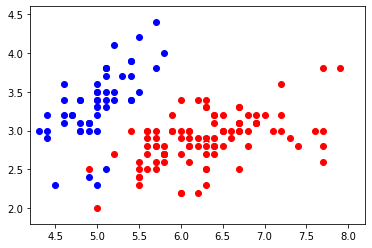

In [3]:
import pandas as pd
import numpy as np
from bisecting_kmeans import biKMeansClassifier
import matplotlib.pyplot as plt


if __name__=="__main__":
    data_X = pd.read_csv(r"iris.csv")
    data_X = data_X.drop(data_X.columns[4], axis=1)
    data_X = np.array(data_X)
    # print(data_X)
    
    k = 2
    # k = 3
    clf = biKMeansClassifier(k) # 实例化biKMeansClassifier类
    clf.fit(data_X) # 训练模型
    cents = clf._centroids
    labels = clf._labels
    sse = clf._sse
    colors = ['b','r','m']
    for i in range(k):
        index = np.nonzero(labels==i)[0]
        # print(index)
        x0 = data_X[index, 0]
        x1 = data_X[index, 1]
        y_i = i
        for j in range(len(x0)):
            plt.scatter(x0[j], x1[j], color=colors[i])
        plt.scatter(cents[i,0], cents[i,1], marker='x', color=colors[i], linewidths=7)
    
    # plt.title("SSE={:.2f}".format(sse))
    print("误差平方和为: ", sse)
    plt.axis([4.2,8.2,1.8,4.6])
    outname = "./bisecting_kmeans" + str(k) + ".png"
    plt.savefig(outname)
    plt.show()